# 1. Convolutional Neural Network (CNN) 

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
DATASET_DIR = r"D:\SEMESTER 7\PRAKTIKUM PEMBELAJARAN MESIN\UAP ML\data\dataset_labeled"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20

CLASSES = ['Normal', 'Cataract']
print("📁 Dataset directory:", DATASET_DIR)


📁 Dataset directory: D:\SEMESTER 7\PRAKTIKUM PEMBELAJARAN MESIN\UAP ML\data\dataset_labeled


In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    classes=CLASSES,          
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    classes=CLASSES,          
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)



Found 2730 images belonging to 2 classes.
Found 681 images belonging to 2 classes.


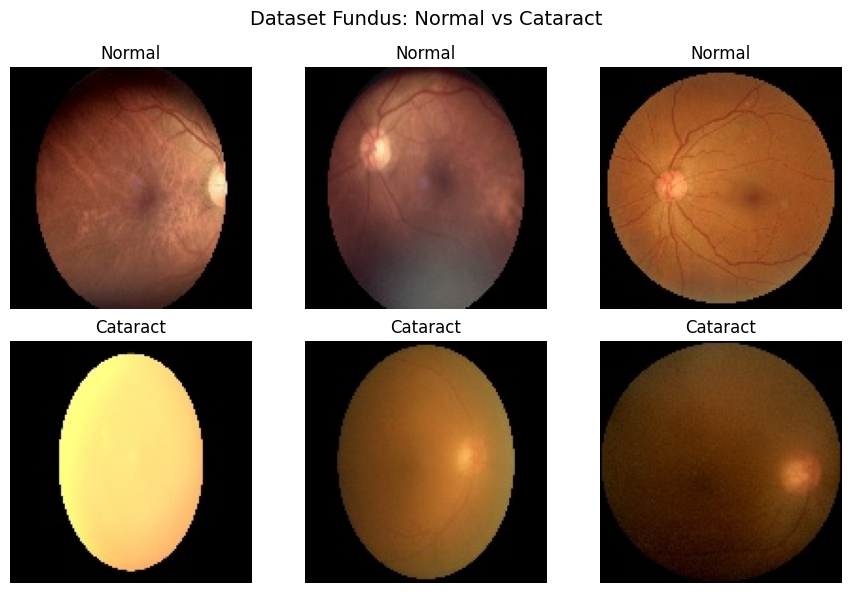

In [8]:
normal_imgs = []
cataract_imgs = []

# Loop generator sampai gambar cukup
for images, labels in train_generator:
    for img, label in zip(images, labels):
        if label == 0 and len(normal_imgs) < 3:
            normal_imgs.append(img)
        elif label == 1 and len(cataract_imgs) < 3:
            cataract_imgs.append(img)

        if len(normal_imgs) == 3 and len(cataract_imgs) == 3:
            break
    if len(normal_imgs) == 3 and len(cataract_imgs) == 3:
        break

plt.figure(figsize=(9, 6))

# Baris atas: NORMAL
for i, img in enumerate(normal_imgs):
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title("Normal")
    plt.axis("off")

# Baris bawah: CATARACT
for i, img in enumerate(cataract_imgs):
    plt.subplot(2, 3, i+4)
    plt.imshow(img)
    plt.title("Cataract")
    plt.axis("off")

plt.suptitle("Dataset Fundus: Normal vs Cataract", fontsize=14)
plt.tight_layout()
plt.show()


In [9]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = cnn_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 344ms/step - accuracy: 0.9011 - loss: 0.3114 - val_accuracy: 0.9090 - val_loss: 0.3258
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 346ms/step - accuracy: 0.9088 - loss: 0.2832 - val_accuracy: 0.9090 - val_loss: 0.2770
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 382ms/step - accuracy: 0.9095 - loss: 0.2671 - val_accuracy: 0.9090 - val_loss: 0.2655
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - accuracy: 0.9143 - loss: 0.2494 - val_accuracy: 0.9090 - val_loss: 0.2621
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 356ms/step - accuracy: 0.9147 - loss: 0.2335 - val_accuracy: 0.9280 - val_loss: 0.2433
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 356ms/step - accuracy: 0.9139 - loss: 0.2480 - val_accuracy: 0.9222 - val_loss: 0.2458
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 342ms/step - accuracy: 0.9205 - loss: 0.2165 - val_accuracy: 0.9339 - val_loss: 0.2186
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.9282 - loss: 0.1911 - val_accu

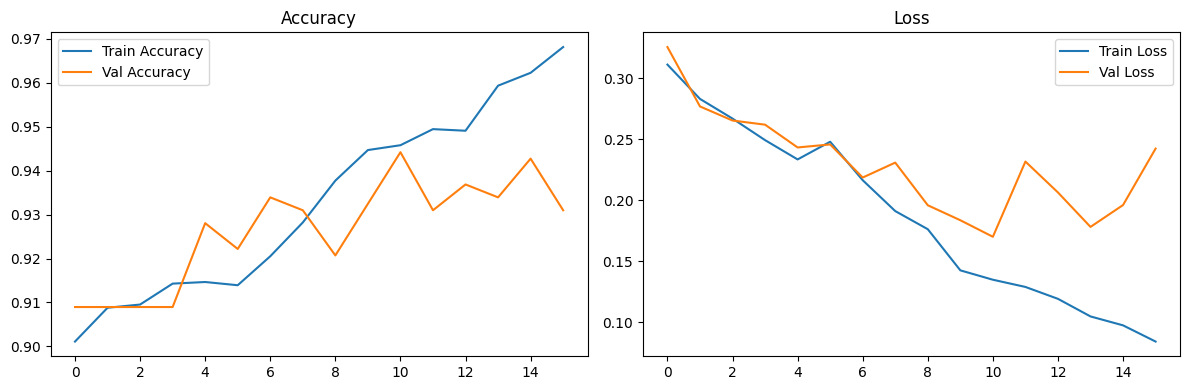

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.tight_layout()
plt.show()

In [12]:
# Reset generator agar prediksi dari awal
val_generator.reset()

# Prediksi probabilitas
y_pred_prob = cnn_model.predict(val_generator, verbose=1)

# Konversi ke label (0 / 1)
y_pred = (y_pred_prob > 0.5).astype("int32").ravel()

# Label asli
y_true = val_generator.classes

print("📊 Classification Report - CNN")
print(classification_report(
    y_true,
    y_pred,
    target_names=CLASSES
))

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
📊 Classification Report - CNN
              precision    recall  f1-score   support

      Normal       0.95      0.99      0.97       619
    Cataract       0.85      0.47      0.60        62

    accuracy                           0.94       681
   macro avg       0.90      0.73      0.79       681
weighted avg       0.94      0.94      0.94       681



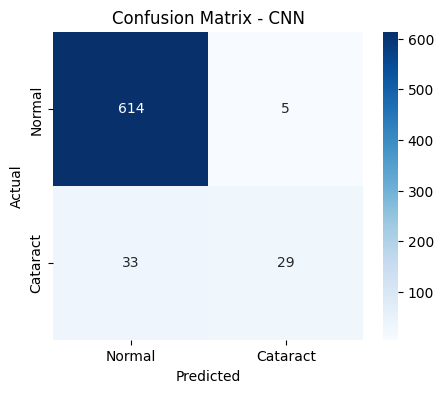

In [13]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=CLASSES,
            yticklabels=CLASSES,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()

In [14]:
cnn_model.save("cnn_cataract_model.h5")
print("✅ CNN model saved")

✅ CNN model saved


# 2. MobileNetV2

In [15]:
# ============================
# MobileNetV2 - Transfer Learning
# ============================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [16]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

datagen_mn = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen_mn = datagen_mn.flow_from_directory(
    DATASET_DIR,
    classes=CLASSES,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_gen_mn = datagen_mn.flow_from_directory(
    DATASET_DIR,
    classes=CLASSES,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 2730 images belonging to 2 classes.
Found 681 images belonging to 2 classes.


In [17]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,
    weights='imagenet'
)

# Freeze pretrained layers
base_model.trainable = False

mobilenet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

mobilenet_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

mobilenet_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_mn = mobilenet_model.fit(
    train_gen_mn,
    epochs=EPOCHS,
    validation_data=val_gen_mn,
    callbacks=[early_stop]
)


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.9267 - loss: 0.2001 - val_accuracy: 0.9515 - val_loss: 0.1528
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 317ms/step - accuracy: 0.9608 - loss: 0.0981 - val_accuracy: 0.9530 - val_loss: 0.1395
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 409ms/step - accuracy: 0.9659 - loss: 0.0848 - val_accuracy: 0.9515 - val_loss: 0.1531
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 351ms/step - accuracy: 0.9700 - loss: 0.0780 - val_accuracy: 0.9515 - val_loss: 0.1693
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 351ms/step - accuracy: 0.9674 - loss: 0.0792 - val_accuracy: 0.9501 - val_loss: 0.1529
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 330ms/step - accuracy: 0.9733 - loss: 0.0708 - val_accuracy: 0.9471 - val_loss: 0.1706
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 324ms/step - accuracy: 0.9733 - loss: 0.0685 - val_accuracy: 0.9501 - val_loss: 0.1865


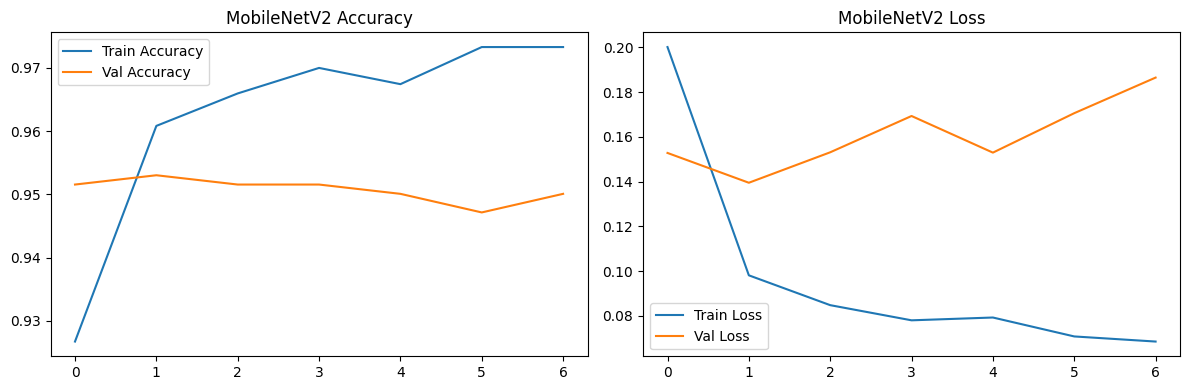

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_mn.history['accuracy'], label='Train Accuracy')
plt.plot(history_mn.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("MobileNetV2 Accuracy")

plt.subplot(1,2,2)
plt.plot(history_mn.history['loss'], label='Train Loss')
plt.plot(history_mn.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("MobileNetV2 Loss")

plt.tight_layout()
plt.show()


In [20]:
# Reset generator
val_gen_mn.reset()

# Predict
y_pred_prob_mn = mobilenet_model.predict(val_gen_mn, verbose=1)
y_pred_mn = (y_pred_prob_mn > 0.5).astype("int32").ravel()

y_true = val_gen_mn.classes

print("📊 Classification Report - MobileNetV2")
print(classification_report(
    y_true,
    y_pred_mn,
    target_names=CLASSES
))


22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step
📊 Classification Report - MobileNetV2
              precision    recall  f1-score   support

      Normal       0.96      0.99      0.97       619
    Cataract       0.84      0.60      0.70        62

    accuracy                           0.95       681
   macro avg       0.90      0.79      0.84       681
weighted avg       0.95      0.95      0.95       681



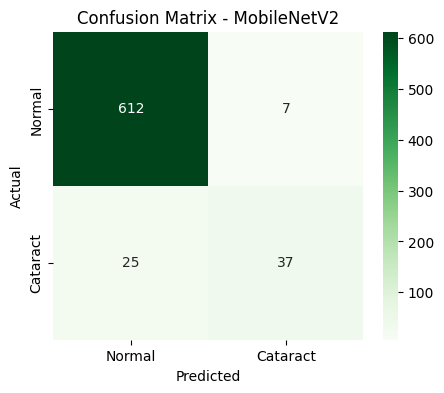

In [21]:
cm_mn = confusion_matrix(y_true, y_pred_mn)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_mn,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=CLASSES,
    yticklabels=CLASSES
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MobileNetV2")
plt.show()

In [22]:
mobilenet_model.save("mobilenetv2_cataract_model.h5")
print("✅ MobileNetV2 model saved")

✅ MobileNetV2 model saved


# 3. EfficientnetB0

In [23]:
# ============================
# EfficientNetB0 - Transfer Learning
# ============================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [25]:
from tensorflow.keras.applications.efficientnet import preprocess_input

datagen_eff = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen_eff = datagen_eff.flow_from_directory(
    DATASET_DIR,
    classes=CLASSES,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_gen_eff = datagen_eff.flow_from_directory(
    DATASET_DIR,
    classes=CLASSES,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 2730 images belonging to 2 classes.
Found 681 images belonging to 2 classes.


In [26]:
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(128,128,3),
    include_top=False,
    weights='imagenet'
)

# Freeze feature extractor
base_model.trainable = False

efficientnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

efficientnet_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

efficientnet_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [27]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_eff = efficientnet_model.fit(
    train_gen_eff,
    epochs=EPOCHS,
    validation_data=val_gen_eff,
    callbacks=[early_stop]
)


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 51s 488ms/step - accuracy: 0.9538 - loss: 0.1237 - val_accuracy: 0.9471 - val_loss: 0.1566
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 437ms/step - accuracy: 0.9645 - loss: 0.0947 - val_accuracy: 0.9559 - val_loss: 0.1517
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 402ms/step - accuracy: 0.9670 - loss: 0.0863 - val_accuracy: 0.9589 - val_loss: 0.1676
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 453ms/step - accuracy: 0.9670 - loss: 0.0811 - val_accuracy: 0.9604 - val_loss: 0.1571
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 427ms/step - accuracy: 0.9692 - loss: 0.0807 - val_accuracy: 0.9530 - val_loss: 0.1378
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 436ms/step - accuracy: 0.9711 - loss: 0.0762 - val_accuracy: 0.9545 - val_loss: 0.1623
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 407ms/step - accuracy: 0.9670 - loss: 0.0747 - val_accuracy: 0.9589 - val_loss: 0.1688
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 401ms/step - accuracy: 0.9740 - loss: 0.0685 - val_accu

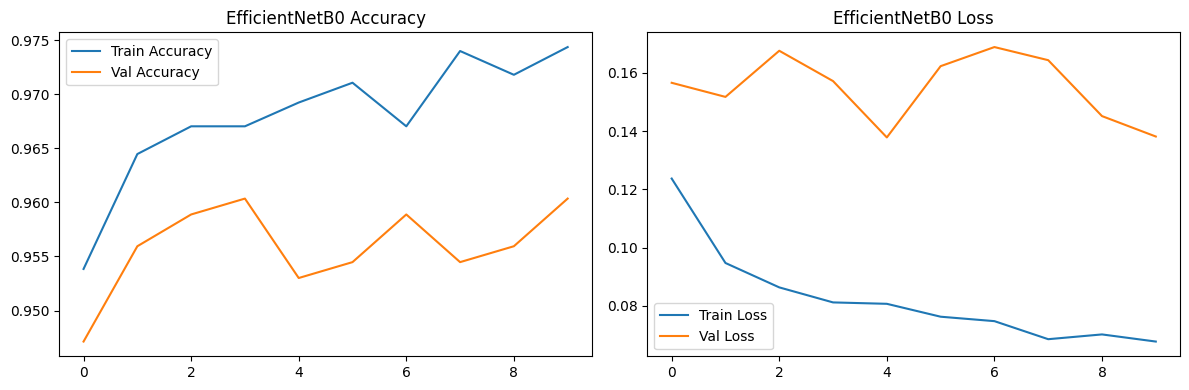

In [28]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_eff.history['accuracy'], label='Train Accuracy')
plt.plot(history_eff.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("EfficientNetB0 Accuracy")

plt.subplot(1,2,2)
plt.plot(history_eff.history['loss'], label='Train Loss')
plt.plot(history_eff.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("EfficientNetB0 Loss")

plt.tight_layout()
plt.show()


In [29]:
# Reset generator
val_gen_eff.reset()

# Predict
y_pred_prob_eff = efficientnet_model.predict(val_gen_eff, verbose=1)
y_pred_eff = (y_pred_prob_eff > 0.5).astype("int32").ravel()

y_true = val_gen_eff.classes

print("📊 Classification Report - EfficientNetB0")
print(classification_report(
    y_true,
    y_pred_eff,
    target_names=CLASSES
))


22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 424ms/step
📊 Classification Report - EfficientNetB0
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       619
    Cataract       0.77      0.69      0.73        62

    accuracy                           0.95       681
   macro avg       0.87      0.84      0.85       681
weighted avg       0.95      0.95      0.95       681



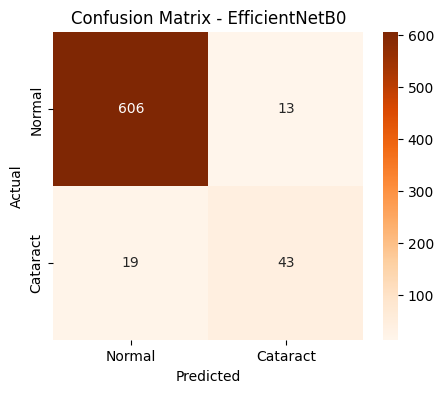

In [30]:
cm_eff = confusion_matrix(y_true, y_pred_eff)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_eff,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=CLASSES,
    yticklabels=CLASSES
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()


In [31]:
efficientnet_model.save("efficientnetb0_cataract_model.h5")
print("✅ EfficientNetB0 model saved")


✅ EfficientNetB0 model saved
